In [228]:
from IPython.display import SVG, display
import chess

from chess import Board, SquareSet, Color

In [230]:
def gen_boards(board: Board):
    ret = list()
    moves = board.legal_moves
    for m in moves:
        nb = board.copy()
        nb.push(m)
        ret.append(nb)
    return ret

def print_board(board: Board, squares: SquareSet=None) -> None:
    print("WHITE" if board.turn else "BLACK")

    piece_val = get_piece_val_sum(board, color=board.turn)
    print(f"Piece val sum: {piece_val}")
    piece_val_opponent = get_piece_val_sum(board, color=not board.turn)
    print(f"Piece val diff: {piece_val - piece_val_opponent}")

    attacking_sqrs = get_attacked_sqrs(board, color=board.turn)
    print(f"Attactking sqrs: {len(attacking_sqrs)}")
    attacking_sqrs_opponent = get_attacked_sqrs(board, color=not board.turn)
    print(f"Attactking sqrs diff: {len(attacking_sqrs) - len(attacking_sqrs_opponent)}")

    attacking_pieces_sum = get_attacked_sqrs_piece_vals(board, color=board.turn)
    print(f"Attacking pieces sum: {attacking_pieces_sum}")
    attacking_pieces_sum_opponent = get_attacked_sqrs_piece_vals(board, color=not board.turn)
    print(f"Attacking pieces diff: {attacking_pieces_sum - attacking_pieces_sum_opponent}")

    attacking_pieces_sum = get_defended_sqrs_piece_vals(board, color=board.turn)
    print(f"Defended pieces sum: {attacking_pieces_sum}")
    attacking_pieces_sum_opponent = get_defended_sqrs_piece_vals(board, color=not board.turn)
    print(f"Defended pieces diff: {attacking_pieces_sum - attacking_pieces_sum_opponent}")

    eval = eval_board(board)
    print(f"*** EVAL: {eval} ***")

    svg = chess.svg.board(board, squares=squares)
    display(SVG(svg))
    print(svg)

def eval_board(board: Board) -> int:
    piece_val = get_piece_val_sum(board, color=board.turn)
    piece_val_opponent = get_piece_val_sum(board, color=not board.turn)
    piece_val_diff = piece_val - piece_val_opponent

    attacking_sqrs = get_attacked_sqrs(board, color=board.turn)
    attacking_sqrs_opponent = get_attacked_sqrs(board, color=not board.turn)
    attacking_sqrs_diff = len(attacking_sqrs) - len(attacking_sqrs_opponent)

    attacking_pieces_sum = get_attacked_sqrs_piece_vals(board, color=board.turn)
    attacking_pieces_sum_opponent = get_attacked_sqrs_piece_vals(board, color=not board.turn)
    attacking_pieces_sum_diff = attacking_pieces_sum - attacking_pieces_sum_opponent

    defended_pieces_sum = get_defended_sqrs_piece_vals(board, color=board.turn)
    defended_pieces_sum_opponent = get_defended_sqrs_piece_vals(board, color=not board.turn)
    defended_pieces_sum_diff = defended_pieces_sum - defended_pieces_sum_opponent

    return piece_val_diff*1000 \
        + attacking_sqrs_diff*1 \
        + attacking_pieces_sum_diff*5 \
        + defended_pieces_sum_diff*2


In [50]:
def get_all_pieces(board: Board, color: Color) -> SquareSet:
    ret = SquareSet()
    for t in [chess.KING, chess.QUEEN, chess.ROOK, chess.KNIGHT, chess.BISHOP, chess.PAWN]:
        ret = ret | board.pieces(piece_type=t, color=color)
    return ret

In [83]:
def get_piece_val(piece_type: chess.PieceType) -> int:
    if piece_type == chess.KING: return 20
    if piece_type == chess.QUEEN: return 9
    if piece_type == chess.ROOK: return 5
    if piece_type == chess.BISHOP: return 3
    if piece_type == chess.KNIGHT: return 3
    if piece_type == chess.PAWN: return 1

def get_piece_val_sum(board: Board, color: Color) -> int:
    ret = 0
    for t in [chess.QUEEN, chess.ROOK, chess.KNIGHT, chess.BISHOP, chess.PAWN]:
        count = len(board.pieces(piece_type=t, color=color))
        ret = ret + count * get_piece_val(t)
    return ret

In [90]:
def get_attacked_sqrs(board: Board, color: Color) -> SquareSet:
    sqrs = SquareSet()
    pieces = get_all_pieces(board, color)
    for p in pieces:
        sqrs = sqrs | board.attacks(p)
    return sqrs

def get_attacked_sqrs_piece_vals(board: Board, color: Color) -> int:
    ret = 0
    attacked_sqrs = get_attacked_sqrs(board, color)
    for atsq in attacked_sqrs:
        p = board.piece_at(atsq)
        if p is not None and p.color is not color:
            ret = ret + get_piece_val(p.piece_type)
    return ret

def get_defended_sqrs_piece_vals(board: Board, color: Color) -> int:
    ret = 0
    attacked_sqrs = get_attacked_sqrs(board, color)
    for atsq in attacked_sqrs:
        p = board.piece_at(atsq)
        if p is not None and p.color is board.turn and p.piece_type is not chess.KING:
            ret = ret + get_piece_val(p.piece_type)
    return ret

In [226]:
import random

random.seed()

b = Board()
# for i in range(20):
#     boards = gen_boards(b)
#     b = boards[random.randint(0, len(boards))]


In [220]:
def recursive_eval(board: Board, rec_level:int = 0, stats:dict = dict()) -> int:
    if stats is not None:
        count_for_lvl = stats.get(rec_level)
        if count_for_lvl is None: count_for_lvl = 1
        else: count_for_lvl = count_for_lvl + 1
        stats[rec_level] = count_for_lvl

    if rec_level == 0: return eval_board(board)
    best_eval: int = None
    for m in gen_boards(board):
        move_eval = recursive_eval(m, rec_level=rec_level - 1, stats=stats)
        if best_eval is None or move_eval < best_eval: best_eval = move_eval
    return -best_eval

{0: 20}
Rec eval: 51
BLACK
Piece val sum: 39
Piece val diff: 0
Attactking sqrs: 22
Attactking sqrs diff: -7
Attacking pieces sum: 0
Attacking pieces diff: 0
Defended pieces sum: 29
Defended pieces diff: 29
*** EVAL: 51 ***


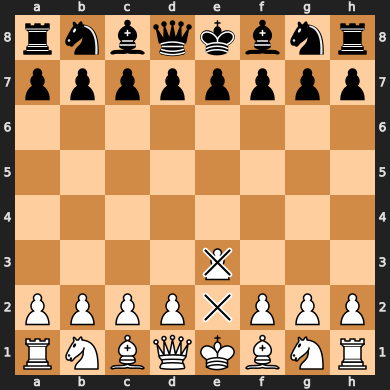

<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" version="1.2" baseProfile="tiny" viewBox="0 0 390 390"><desc><pre>r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . P . . .
P P P P . P P P
R N B Q K B N R</pre></desc><defs><g id="white-pawn" class="white pawn"><path d="M22.5 9c-2.21 0-4 1.79-4 4 0 .89.29 1.71.78 2.38C17.33 16.5 16 18.59 16 21c0 2.03.94 3.84 2.41 5.03-3 1.06-7.41 5.55-7.41 13.47h23c0-7.92-4.41-12.41-7.41-13.47 1.47-1.19 2.41-3 2.41-5.03 0-2.41-1.33-4.5-3.28-5.62.49-.67.78-1.49.78-2.38 0-2.21-1.79-4-4-4z" fill="#fff" stroke="#000" stroke-width="1.5" stroke-linecap="round" /></g><g id="white-knight" class="white knight" fill="none" fill-rule="evenodd" stroke="#000" stroke-width="1.5" stroke-linecap="round" stroke-linejoin="round"><path d="M 22,10 C 32.5,11 38.5,18 38,39 L 15,39 C 15,30 25,32.5 23,18" style="fill:#ffffff; stroke:#000000;" /><path d="M 24,18 C 24.38,20.91 18.45,25.37 16,27 C 13,29 13.18

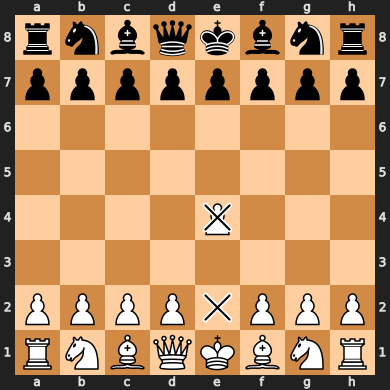

<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" version="1.2" baseProfile="tiny" viewBox="0 0 390 390"><desc><pre>r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R</pre></desc><defs><g id="white-pawn" class="white pawn"><path d="M22.5 9c-2.21 0-4 1.79-4 4 0 .89.29 1.71.78 2.38C17.33 16.5 16 18.59 16 21c0 2.03.94 3.84 2.41 5.03-3 1.06-7.41 5.55-7.41 13.47h23c0-7.92-4.41-12.41-7.41-13.47 1.47-1.19 2.41-3 2.41-5.03 0-2.41-1.33-4.5-3.28-5.62.49-.67.78-1.49.78-2.38 0-2.21-1.79-4-4-4z" fill="#fff" stroke="#000" stroke-width="1.5" stroke-linecap="round" /></g><g id="white-knight" class="white knight" fill="none" fill-rule="evenodd" stroke="#000" stroke-width="1.5" stroke-linecap="round" stroke-linejoin="round"><path d="M 22,10 C 32.5,11 38.5,18 38,39 L 15,39 C 15,30 25,32.5 23,18" style="fill:#ffffff; stroke:#000000;" /><path d="M 24,18 C 24.38,20.91 18.45,25.37 16,27 C 13,29 13.18

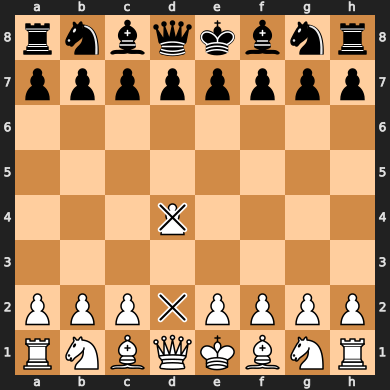

<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" version="1.2" baseProfile="tiny" viewBox="0 0 390 390"><desc><pre>r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R</pre></desc><defs><g id="white-pawn" class="white pawn"><path d="M22.5 9c-2.21 0-4 1.79-4 4 0 .89.29 1.71.78 2.38C17.33 16.5 16 18.59 16 21c0 2.03.94 3.84 2.41 5.03-3 1.06-7.41 5.55-7.41 13.47h23c0-7.92-4.41-12.41-7.41-13.47 1.47-1.19 2.41-3 2.41-5.03 0-2.41-1.33-4.5-3.28-5.62.49-.67.78-1.49.78-2.38 0-2.21-1.79-4-4-4z" fill="#fff" stroke="#000" stroke-width="1.5" stroke-linecap="round" /></g><g id="white-knight" class="white knight" fill="none" fill-rule="evenodd" stroke="#000" stroke-width="1.5" stroke-linecap="round" stroke-linejoin="round"><path d="M 22,10 C 32.5,11 38.5,18 38,39 L 15,39 C 15,30 25,32.5 23,18" style="fill:#ffffff; stroke:#000000;" /><path d="M 24,18 C 24.38,20.91 18.45,25.37 16,27 C 13,29 13.18

In [231]:
st = dict()

next_moves = list()
for board in gen_boards(b):
    next_moves.append([board, recursive_eval(board, rec_level=0, stats=st )])

next_moves.sort(key=lambda mv: mv[1])

print(st)

for mv in next_moves[:3] :
    print(f"Rec eval: {mv[1]}")
    move = mv[0].peek()
    highlight = SquareSet()
    highlight.add(move.from_square)
    highlight.add(move.to_square)
    print_board(mv[0], squares=highlight)

